In [1]:
import os
import json
from PIL import Image
from scipy import ndimage
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_name = '10.1.1.6.2215_30.jpg'
dir_name = 'Valid_Images'
path = '/'.join([dir_name, image_name])

In [3]:
im = Image.open(path).convert("L")

In [4]:
im.load()
data = np.asarray(im, dtype="int32" )

In [5]:
# binarization
threshold = 200
fn = lambda x : 255 if x > threshold else 0
image = im.convert('L').point(fn, mode='1')

binarized_data = np.array(image)
to_int = np.vectorize(int)
binary_data = to_int(image)

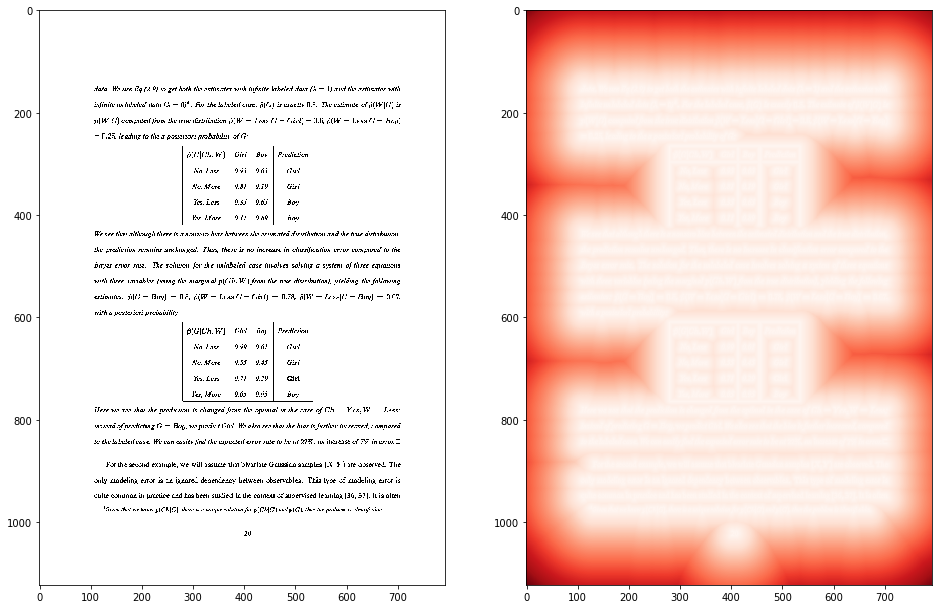

In [7]:
# 1. Euclidean
euc_tranformed = ndimage.distance_transform_edt(binary_data)
euc_tranformed = np.round(255*euc_tranformed/np.max(euc_tranformed)).astype('uint8')

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(1-binary_data, cmap='Greys');
axs[1].imshow(euc_tranformed, cmap='Reds');

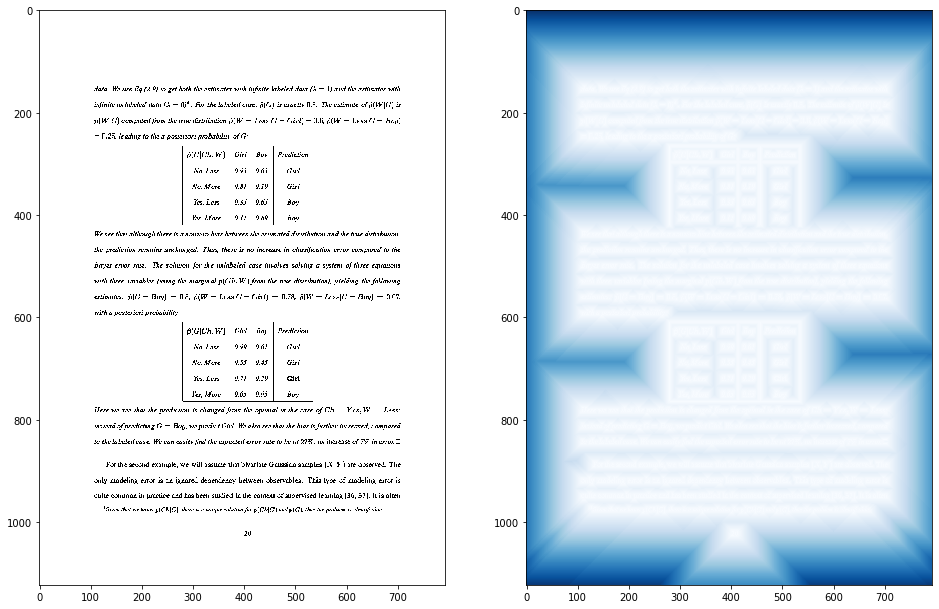

In [8]:
# 2. Chessboard
chess_tranformed = ndimage.distance_transform_cdt(binary_data, metric='chessboard')
chess_tranformed = np.round(255*chess_tranformed/np.max(chess_tranformed)).astype('uint8')

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(1-binary_data, cmap='Greys');
axs[1].imshow(chess_tranformed, cmap='Blues');

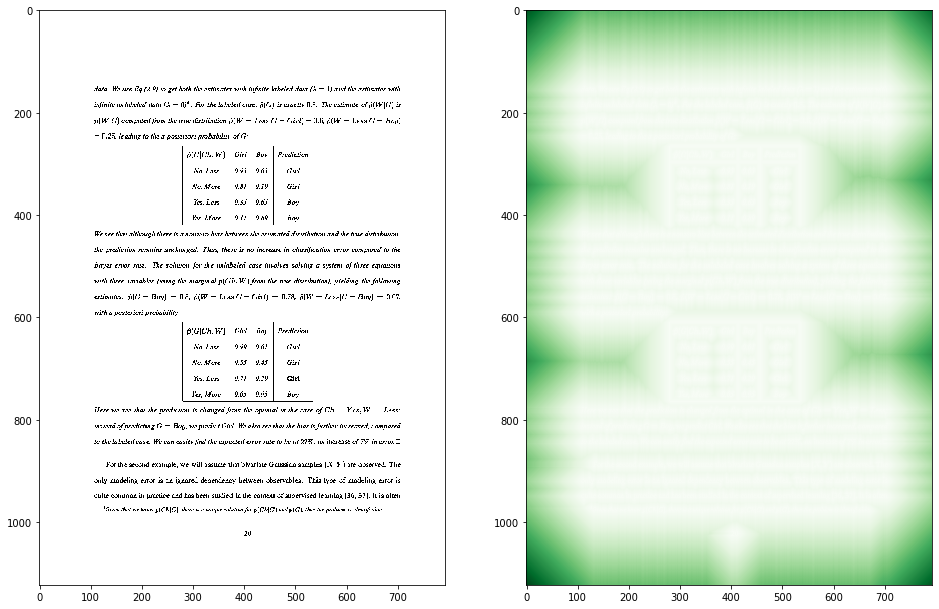

In [9]:
# 2. Taxicab
taxicab_tranformed = ndimage.distance_transform_cdt(binary_data, metric='taxicab')
taxicab_tranformed = np.round(255*taxicab_tranformed/np.max(taxicab_tranformed)).astype('uint8')

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(1-binary_data, cmap='Greys');
axs[1].imshow(taxicab_tranformed, cmap='Greens');

In [21]:
transformed_data = np.array([list(zip(x, y, z)) for x, y, z in\
                             zip(euc_tranformed, chess_tranformed, taxicab_tranformed)])

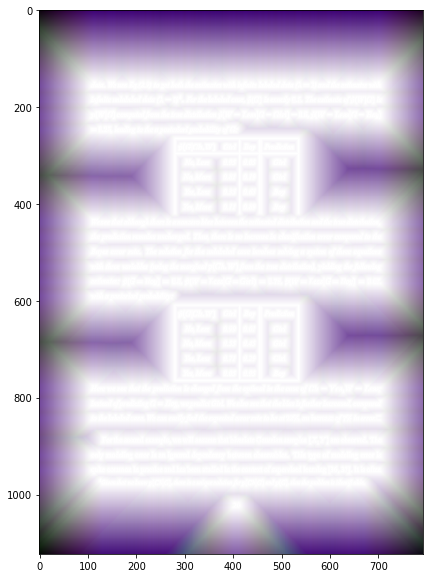

In [22]:
# final image (transformed one)
plt.figure(figsize=(16, 10))
plt.imshow(255 - transformed_data); # REVERSED

In [12]:
#Image.fromarray(transformed_data)